In [1]:
# Manipulation des données
import pandas as pd
import numpy as np
#Visualiazion
import matplotlib.pyplot as plt
import seaborn as sns 

## Context and Motivation :

## Introduction
Lung cancer is one of the deadliest cancers, often diagnosed at an advanced stage. Studies show that factors such as smoking, exposure to pollutants, and symptoms like persistent coughing or fatigue are closely related to its development.

The goal of this project is to leverage a dataset containing patient information (lifestyle habits, medical conditions, etc.) to:
1. Identify the relationships between these factors and lung cancer diagnosis.
2. Build a predictive model to detect at-risk patients early.

### Scientific Context
According to the *Global Cancer Report 2020* published by the WHO, around 85% of lung cancer cases are related to smoking. Early detection could significantly reduce mortality. Recent studies, such as one published in *Nature Medicine* (2019), show that AI models achieve high accuracy in early detection using simple data.




## DataSet Description

In [ ]:
data = pd.read_csv("survey lung cancer.csv")
print(data.head())
print(data.info())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


# Dataset Description

## 1. Overview
- **Number of attributes**: 16
- **Number of instances**: 309
- **Target variable**: `LUNG_CANCER` (indicates whether the patient has lung cancer: YES/NO)
- The dataset focuses on identifying factors associated with lung cancer based on patient demographics, habits, and symptoms.

## 2. Features
- **Gender**: Patient's gender (M = Male, F = Female).
- **Age**: Age of the patient (numeric).
- **Smoking**: Whether the patient smokes (YES = 2, NO = 1).
- **Yellow Fingers**: Presence of yellow fingers (YES = 2, NO = 1).
- **Anxiety**: Whether the patient experiences anxiety (YES = 2, NO = 1).
- **Peer Pressure**: Whether the patient is influenced by peer pressure (YES = 2, NO = 1).
- **Chronic Disease**: Presence of chronic disease (YES = 2, NO = 1).
- **Fatigue**: Whether the patient feels fatigue frequently (YES = 2, NO = 1).
- **Allergy**: Presence of allergies (YES = 2, NO = 1).
- **Wheezing**: Whether the patient experiences wheezing (YES = 2, NO = 1).
- **Alcohol Consumption**: Whether the patient consumes alcohol (YES = 2, NO = 1).
- **Coughing**: Presence of persistent coughing (YES = 2, NO = 1).
- **Shortness of Breath**: Whether the patient experiences shortness of breath (YES = 2, NO = 1).
- **Swallowing Difficulty**: Whether the patient has difficulty swallowing (YES = 2, NO = 1).
- **Chest Pain**: Whether the patient experiences chest pain (YES = 2, NO = 1).

## 3. Initial Observations
- **No missing values**: The dataset is complete.
- Most features are **binary variables** (1 or 2), except for `AGE`, which is numerical.
- The target variable, `LUNG_CANCER`, is categorical (YES/NO).



In [6]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

# Encoding 'Gender'
gender_encoder = LabelEncoder()
data['GENDER'] = gender_encoder.fit_transform(data['GENDER'])

# Encoding 'LUNG_CANCER'
lung_cancer_encoder = LabelEncoder()
data['LUNG_CANCER'] = lung_cancer_encoder.fit_transform(data['LUNG_CANCER'])


In [7]:
print(data[['GENDER', 'LUNG_CANCER']].head())


   GENDER  LUNG_CANCER
0       1            1
1       1            1
2       0            0
3       1            0
4       0            0


We encoded the categorical variables `GENDER` and `LUNG_CANCER` into binaries:

- **For `GENDER`**:
  - Male is represented as `1`
  - Female is represented as `0`

- **For `LUNG_CANCER`**:
  - Having cancer is represented as `1`
  - Not having cancer is represented as `0`


## ---------------- EDA -------------------


In [8]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [10]:
data.duplicated().sum()

np.int64(33)

In [11]:
#remove repeated rows
data.drop_duplicates(inplace=True)
# check that removing is done
data.duplicated().sum()

np.int64(0)

NameError: name 'df' is not defined

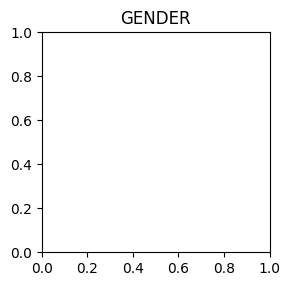

In [ ]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=data,x=data[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()